In [1]:
census = read.csv('census.csv')

In [2]:
library(caTools)
# Randomly split the data into training and testing sets
set.seed(2000)
split = sample.split(census$over50k, SplitRatio = 0.60)

# Split up the data using subset
train = subset(census, split==TRUE)
test = subset(census, split==FALSE)

In [3]:
censusLog = glm(over50k ~ ., data = train, family=binomial)
summary(censusLog)

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = over50k ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1065  -0.5037  -0.1804  -0.0008   3.3383  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -8.658e+00  1.379e+00  -6.279 3.41e-10
age                                       2.548e-02  2.139e-03  11.916  < 2e-16
workclass Federal-gov                     1.105e+00  2.014e-01   5.489 4.03e-08
workclass Local-gov                       3.675e-01  1.821e-01   2.018 0.043641
workclass Never-worked                   -1.283e+01  8.453e+02  -0.015 0.987885
workclass Private                         6.012e-01  1.626e-01   3.698 0.000218
workclass Self-emp-inc                    7.575e-01  1.950e-01   3.884 0.000103
workclass Self-emp-not-inc                1.855e-01  1.774e-01   1.046 0.295646
workclass State-gov                       4

In [4]:
# Predictions on the test set
censusLogPredict = predict(censusLog, type="response", newdata =test)

# Confusion matrix with threshold of 0.3
table(test$over50k, censusLogPredict > 0.5)


Warning message:
In predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == : prediction from a rank-deficient fit may be misleading

        
         FALSE TRUE
   <=50K  9051  662
   >50K   1190 1888

In [5]:
(9051 + 1888)/nrow(test)

[1] 0.8552107

In [6]:
table(test$over50k)


 <=50K   >50K 
  9713   3078 

In [7]:
9713/nrow(test)

[1] 0.7593621

In [8]:
# Test set AUC 
library(ROCR)
ROCRpred = prediction(censusLogPredict, test$over50k)
as.numeric(performance(ROCRpred, "auc")@y.values)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



[1] 0.9061598

In [10]:
library(rpart)
library(rpart.plot)
CART = rpart(over50k ~ ., data=train, method="class")

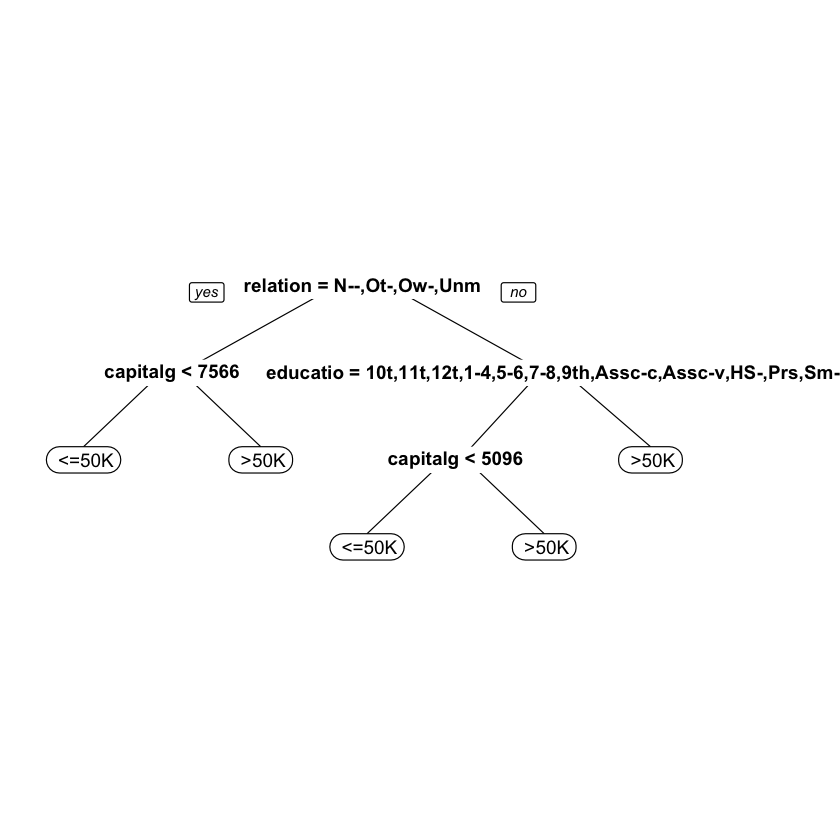

In [11]:
prp(CART)

In [12]:
# Make predictions
PredictTest = predict(CART, newdata = test, type = "class")

table(test$over50k, PredictTest)

        PredictTest
          <=50K  >50K
   <=50K   9243   470
   >50K    1482  1596

In [13]:
(9243+1596)/nrow(test)

[1] 0.8473927

In [14]:
CARTTest2 = predict(CART, newdata = test)


In [17]:
ROCRpred2 = prediction(CARTTest2[,2], test$over50k)
as.numeric(performance(ROCRpred2, "auc")@y.values)

[1] 0.8470256

In [18]:
set.seed(1)

trainSmall = train[sample(nrow(train), 2000), ]

In [19]:
set.seed(1)
library(randomForest)
forest = randomForest(over50k ~ ., data = trainSmall)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [20]:
forestPredict = predict(forest, newdata = test)


In [25]:
str(forestPredict)

 Factor w/ 2 levels " <=50K"," >50K": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:12791] "2" "5" "7" "8" ...


In [26]:
table(test$over50k, forestPredict)


        forestPredict
          <=50K  >50K
   <=50K   9586   127
   >50K    1985  1093

In [27]:
(9586 + 1093) / nrow(test)

[1] 0.8348839

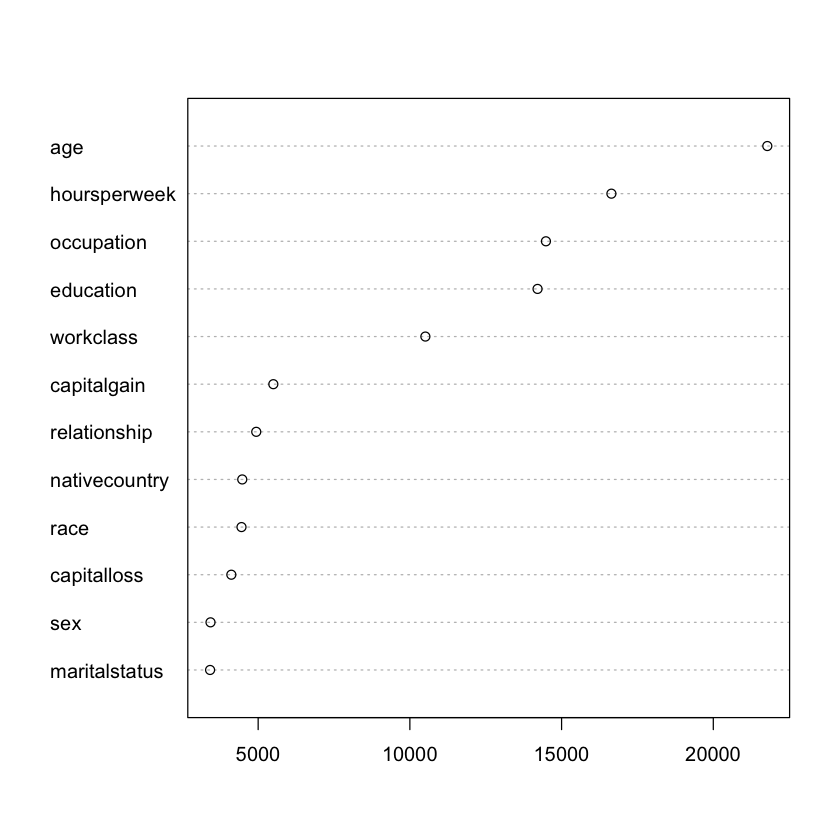

In [29]:
vu = varUsed(forest, count=TRUE)

vusorted = sort(vu, decreasing = FALSE, index.return = TRUE)

dotchart(vusorted$x, names(forest$forest$xlevels[vusorted$ix]))

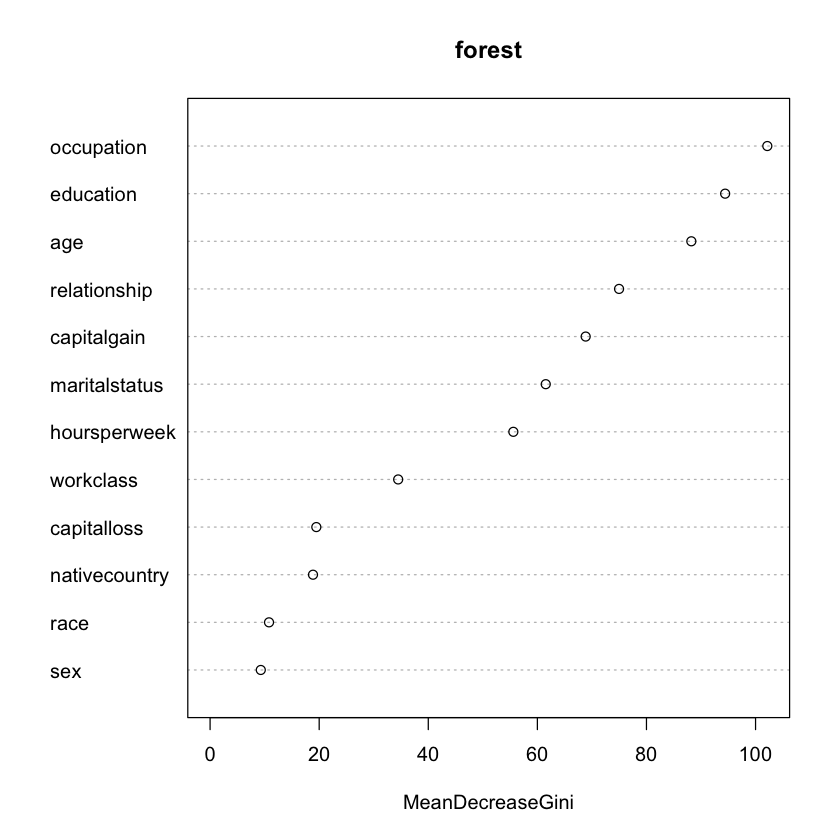

In [30]:
varImpPlot(forest)

In [31]:
cartGrid = expand.grid( .cp = seq(0.002,0.1,0.002))

In [32]:
library(caret)
library(e1071)

Loading required package: lattice
Loading required package: ggplot2


In [33]:
numFolds = trainControl( method = "cv", number = 10 )

In [34]:
train(over50k ~ ., data = train, method = "rpart", trControl = numFolds, tuneGrid = cartGrid )


CART 

19187 samples
   12 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 17268, 17268, 17269, 17269, 17268, 17268, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa       Accuracy SD   Kappa SD  
  0.002  0.8507845  0.55570805  0.0072513954  0.02566119
  0.004  0.8478138  0.55443244  0.0083990109  0.02832761
  0.006  0.8457287  0.54171185  0.0083344105  0.02808838
  0.008  0.8435918  0.53654514  0.0081096180  0.02571367
  0.010  0.8429665  0.53376245  0.0082822290  0.02796372
  0.012  0.8429665  0.53376245  0.0082822290  0.02796372
  0.014  0.8429665  0.53376245  0.0082822290  0.02796372
  0.016  0.8420280  0.52902116  0.0080092386  0.03002814
  0.018  0.8405687  0.51939867  0.0071413269  0.03024233
  0.020  0.8396825  0.51174692  0.0069489836  0.02741371
  0.022  0.8387966  0.50342412  0.0077301047  0.02839278
  0.024  0.8387966  0.50342412  0.0077301047  0.02839278
  0.026  0.8

In [35]:
CART2 = rpart(over50k ~ ., data=train, method="class", cp=0.002)

In [36]:
# Make predictions
PredictTest2 = predict(CART2, newdata = test, type = "class")

table(test$over50k, PredictTest2)

        PredictTest2
          <=50K  >50K
   <=50K   9178   535
   >50K    1240  1838

In [37]:
(9178+1838)/nrow(test)

[1] 0.8612306

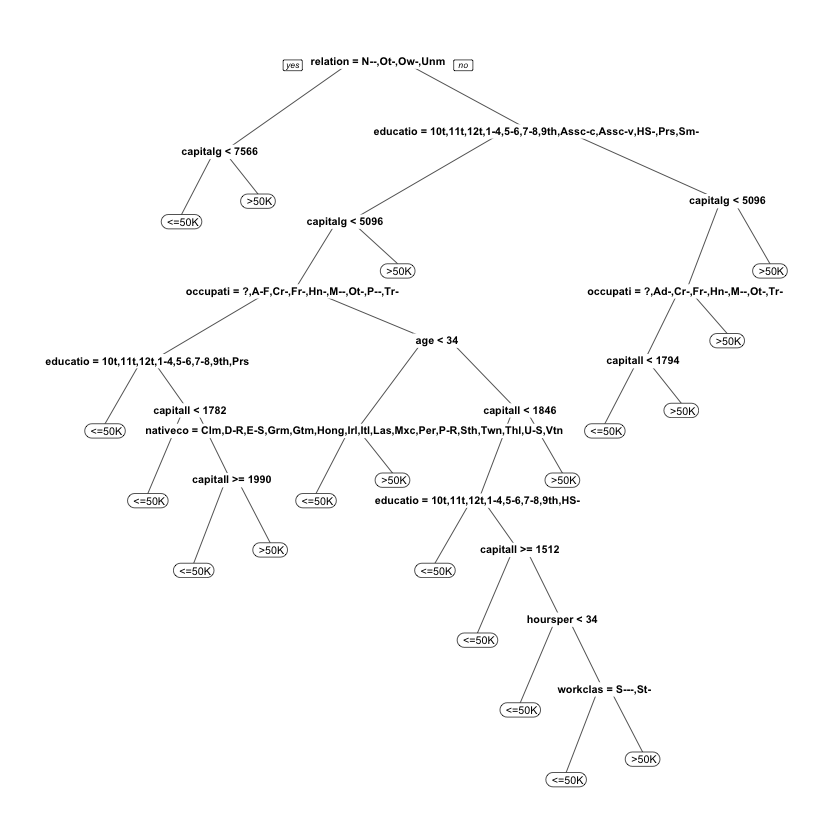

In [38]:
prp(CART2)